In [10]:
import numpy as np # for numerical operations
import pandas as pd # for handling input data
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization
train = pd.read_csv('BMI_Dataset_train.csv',na_values=['?']) # uses pandas library to open a .csv file
test = pd.read_csv('BMI_Dataset_test.csv')

In [11]:
train.head()

,ID,Height(meter),Weight(KG),BMI
0,1,1.670896,51.241195,18.353562
1,2,1.816486,61.895899,18.758478
2,3,1.762728,69.396475,22.334015
3,4,1.732702,64.547965,21.499828
4,5,1.721810,65.437580,22.072758


In [12]:
x=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [13]:
x

,ID,Height(meter),Weight(KG)
0,1,1.670896,51.241195
1,2,1.816486,61.895899
2,3,1.762728,69.396475
3,4,1.732702,64.547965
4,5,1.721810,65.437580
...,...,...,...
995,996,1.655772,64.105221
996,997,1.719892,61.632511
997,998,1.779307,61.069727
998,999,1.709546,55.336545


In [14]:
data=np.array(train)
X = data[:,:-1]
Y=data[:,-1]

In [15]:
X

array([[   1.        ,    1.67089607,   51.24119481],
       [   2.        ,    1.81648633,   61.89589865],
       [   3.        ,    1.762728  ,   69.39647493],
       ...,
       [ 998.        ,    1.77930708,   61.06972693],
       [ 999.        ,    1.70954624,   55.33654501],
       [1000.        ,    1.6865125 ,   58.2057889 ]])

In [16]:
np.random.seed(42)
batch = np.random.choice(range(100), 20)

In [17]:
batch

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
       87, 29, 37])

In [18]:
X_batch = X[batch,:]

In [19]:
X[[0,1],:]

array([[ 1.        ,  1.67089607, 51.24119481],
       [ 2.        ,  1.81648633, 61.89589865]])

In [20]:
X_batch

array([[ 52.        ,   1.75522738,  52.47283373],
       [ 93.        ,   1.79214856,  59.77029095],
       [ 15.        ,   1.80572664,  63.48774627],
       [ 72.        ,   1.73342808,  58.28342673],
       [ 61.        ,   1.73491017,  58.84530332],
       [ 21.        ,   1.74952177,  65.09387889],
       [ 83.        ,   1.75602417,  63.25002576],
       [ 87.        ,   1.73292922,  59.63995735],
       [ 75.        ,   1.66311326,  60.29511724],
       [ 75.        ,   1.66311326,  60.29511724],
       [ 88.        ,   1.73048473,  61.92338027],
       [100.        ,   1.73602929,  60.85146123],
       [ 24.        ,   1.71775222,  64.32788555],
       [  3.        ,   1.762728  ,  69.39647493],
       [ 22.        ,   1.61242121,  44.39773297],
       [ 53.        ,   1.66074242,  56.00136429],
       [  2.        ,   1.81648633,  61.89589865],
       [ 88.        ,   1.73048473,  61.92338027],
       [ 30.        ,   1.76589182,  46.84644919],
       [ 38.        ,   1.72229

In [21]:
W = np.zeros(X.shape[1]) # coefficients
b = 0 # intercept

# run iterations
regression_coef = [np.hstack((W,b))]

In [22]:
np.shape(regression_coef)

(1, 4)

In [23]:
y.shape

(1000,)

In [24]:
x.shape

(1000, 3)

In [25]:
W.shape

(3,)

In [26]:
x=train.drop(['BMI','ID'],axis=1)

In [27]:
x

,Height(meter),Weight(KG)
0,1.670896,51.241195
1,1.816486,61.895899
2,1.762728,69.396475
3,1.732702,64.547965
4,1.721810,65.437580
...,...,...
995,1.655772,64.105221
996,1.719892,61.632511
997,1.779307,61.069727
998,1.709546,55.336545


In [1]:
import numpy as np
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)


# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    """ 
    y_hat=X.dot(W)+b #pred  x(1000,3)  y(1000,1)  w(3,1)
    m=X.shape[0]
    alpha=learn_rate
    y_pred=y_hat-y
    error= (1/2*m)*np.sum(np.square(y_pred))
    dw=(1/m)*np.sum(X.T.dot(y_pred))
    w=W-(alpha*dw)
    db=(1/m)*np.sum(y_pred)
    b=b-alpha*db
    # Fill in code
    W_new=w
    b_new=b
    return W_new, b_new"""
    
    # compute errors
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    # compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    return W_new, b_new


# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef



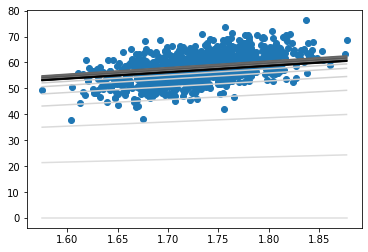

In [15]:
import numpy as np # for numerical operations
import pandas as pd # for handling input data
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization
train = pd.read_csv('BMI_Dataset_train.csv') # uses pandas library to open a .csv file
test = pd.read_csv('BMI_Dataset_test.csv')

# perform gradient descent
t=train.drop(['BMI','ID'],axis=1)
data=np.array(t)
X = data[:,:-1]
y = data[:,-1]

regression_coef = miniBatchGD(X, y)

# plot the results
import matplotlib.pyplot as plt

plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 1)
plt.show()

In [117]:
np.shape(regression_coef)

(26, 2)

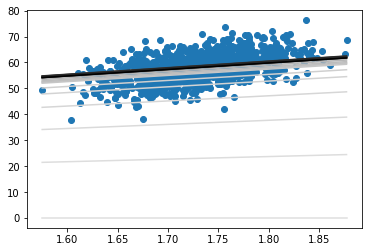

In [118]:
regression_coef = miniBatchGD(X, y)
# plot the results
import matplotlib.pyplot as plt
plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 1)
plt.show()

In [ ]:
# TODO: Add import statements
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assign the dataframe to this variable.
# TODO: Load the data
bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv")

# Make and fit the linear regression model
#TODO: Fit the model and Assign it to bmi_life_model
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

# Mak a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict(21.07931)


In [ ]:
#Programming Quiz: Multiple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the boston house-prices dataset 
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
# TODO: Fit the model and assign it to the model variable
model = LinearRegression()
model.fit(x, y)
# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# TODO: Predict housing price for the sample_house
prediction = model.predict(sample_house)

In [16]:
#Polynomial Regression
# TODO: Add import statements
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
plt.figure()
# Assign the data to predictor and outcome variables
# TODO: Load the data
data = pd.read_csv('data.csv')

#Var_X,Var_Y
#data=np.array(train_data)
X = data['Var_X']
y=data['Var_Y']
X=X.values.reshape(-1, 1)
#X=np.reshape(20,1)

# Create polynomial features
# TODO: Create a PolynomialFeatures object, then fit and transform the
# predictor feature
poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X)

# Make and fit the polynomial regression model
# TODO: Create a LinearRegression object and fit it to the polynomial predictor
# features
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)

<Figure size 432x288 with 0 Axes>

In [43]:
poly_model

LinearRegression(fit_intercept=False)

In [ ]:
#Regularization Exercise
# TODO: Add import statements
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('data.csv', header = None)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X, y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

In [ ]:
#Regularization Exercise with scaling
# TODO: Add import statements
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('data.csv', header = None)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

# TODO: Create the standardization scaling object.
scaler = StandardScaler()

# TODO: Fit the standardization parameters and scale the data.
X_scaled = scaler.fit_transform(X)

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X_scaled, y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

In [1]:
#and perceptron
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1
weight2 = 1
bias = -2


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                    -2                    0          Yes
       0          1                    -1                    0          Yes
       1          0                    -1                    0          Yes
       1          1                     0                    1          Yes


In [2]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0
weight2 = -1
bias = 0.5


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   0.5                    1          Yes
       0          1                  -0.5                    0          Yes
       1          0                   0.5                    1          Yes
       1          1                  -0.5                    0          Yes


In [4]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        # predition in prostive area
        if y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
        # predition in negivate area    
        elif y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
    
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [6]:
#perceptron
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


In [26]:
#kfold
import numpy as np
from sklearn.model_selection import KFold
data=array([1,2,3,4,5,6])
kf = KFold(3,True,1)

for train ,test in kf.split(data):
    print('train {0} , test {1}'.format(data[train], data[test]))
    

train [1 4 5 6] , test [2 3]
train [2 3 4 6] , test [1 5]
train [1 2 3 5] , test [4 6]


Two very important observations:

The training and testing scores come in as a list of 3 values, and this is because the function uses 3-Fold Cross-Validation.
Very important: As you can see, we defined our curves with Training and Testing Error,
and this function defines them with Training and Testing Score.
These are opposite, so the higher the error, the lower the score.
Thus, when you see the curve, you need to flip it upside down in your mind, in order to compare it with the curves above

In [36]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

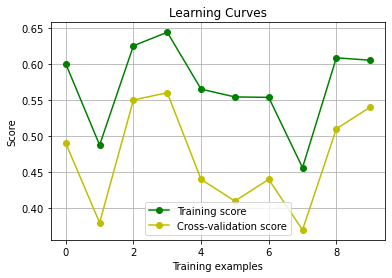

In [67]:
# Import, read, and split data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
data = pd.read_csv('datas.csv')
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

### Logistic Regression
estimator = LogisticRegression()

### Decision Tree
#estimator = GradientBoostingClassifier()

### Support Vector Machine
#estimator = SVC(kernel='rbf', gamma=1000)
randomize(X, y)
draw_learning_curves(X, y, estimator, 10)

In [7]:
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Import the train test split
# http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html


# Read in the data.
data = np.asarray(pd.read_csv('datas.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# Use train test split to split your data 
# Use a test size of 25% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Instantiate your decision tree model
model = DecisionTreeClassifier()

# TODO: Fit the model to the training data.
model.fit(X_train,y_train)
# TODO: Make predictions on the test data
y_pred =model.predict(X_test)

# TODO: Calculate the accuracy and assign it to the variable acc on the test data.
acc = accuracy_score(y_test,y_pred)


In [9]:
y_train

array(['-1', '-1', '1', '-1', '1', '-1', '1', '-1', '-1', '-1', '-1',
       '-1', '1', '-1', '1', '1', '1', '-1', '1', '-1', '1', '1', '-1',
       '1', '-1', '-1', '-1', '1', '1', '1', '-1', '-1', '-1', '-1', '1',
       '-1', '-1', '1', '1', '1', '-1', '-1', '-1', '1', '1', '1', '-1',
       '-1', '-1', '1', '-1', '1', '1', '1', '1', '1', '1', '-1', '1',
       '-1', '-1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '-1',
       '1', '-1', '1'], dtype=object)

In [ ]:
#SVM
# Import statements 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Read the data.
data = np.asarray(pd.read_csv('data.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,:1]
y = data[:,1]

# TODO: Create the model and assign it to the variable model.
# Find the right parameters for this model to achieve 100% accuracy on the dataset.
model = SVC(kernel='rbf', gamma=27)

# TODO: Fit the model.
model.fit(X,y)

# TODO: Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# TODO: Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y, y_pred)

In [ ]:
#Decision Tree
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Read the data.
data = np.asarray(pd.read_csv('data.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,:1]
y = data[:,1]

# TODO: Create the decision tree model and assign it to the variable model.
model = DecisionTreeClassifier()

# TODO: Fit the model.
model.fit(X,y)

# TODO: Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# TODO: Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y, y_pred)